## SECOM – Exploratory Data Analysis (EDA)

In this phase, we will perform a basic exploratory data analysis.

### Key Steps:

1. **Visualize Data**
   - Visualize distributions of sensor features (histograms, boxplots).

2. **Identify Correlations**
   - Check correlations between features (df.corr() heatmap).

3. **Null Value Analysis**
   - Look at missing value patterns (though you’ve mostly cleaned them).


This initial correlation analysis reveals clusters of highly correlated sensors.


Import libraries

In [28]:
import importlib.util
import sys
from pathlib import Path

# CHANGE THIS PATH to where dpf.py actually lives
dpf_path = Path("G:\\GitHub\\SECOM-Process-Sensor-Analysis\\dpf.py")

spec = importlib.util.spec_from_file_location("dpf", dpf_path)
dpf = importlib.util.module_from_spec(spec)
sys.modules["dpf"] = dpf
spec.loader.exec_module(dpf)

# Now test
dpf.Check


<function dpf.Check(df)>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import dpf

Load cleaned data

In [22]:
cleaned_df = pd.read_csv("secom_cleaned.csv")

Drop non-numeric columns for EDA (e.g., Timestamp, Pass/Fail for now)

In [23]:
numeric_df = cleaned_df.select_dtypes(include='number')

Summary statistics

In [24]:
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Feature_1,1567.0,1.623320e-15,1.000319,-3.691957,-0.650398,-0.040180,0.573100,4.654514
Feature_2,1567.0,-5.074010e-15,1.000319,-4.203310,-0.535907,0.044124,0.534633,4.371107
Feature_3,1567.0,-5.713362e-15,1.000319,-4.762831,-0.662273,0.017525,0.595934,3.905635
Feature_4,1567.0,-1.269636e-16,1.000319,-3.173512,-0.708437,-0.250557,0.443002,5.275584
Feature_5,1567.0,4.987856e-17,1.000319,-0.062222,-0.056228,-0.050895,-0.047293,19.797614
...,...,...,...,...,...,...,...,...
Feature_587,1567.0,1.995142e-16,1.000319,-3.105818,-0.648390,-0.077554,0.497330,6.586246
Feature_588,1567.0,-8.161946e-17,1.000319,-1.508045,-0.667329,-0.190165,0.434692,7.205869
Feature_589,1567.0,-2.675304e-16,1.000319,-1.494750,-0.692040,-0.238334,0.389874,8.137772
Feature_590,1567.0,-1.360324e-16,1.000319,-1.062000,-0.589162,-0.295753,0.160893,6.795494


Visualize distributions for a few sample features

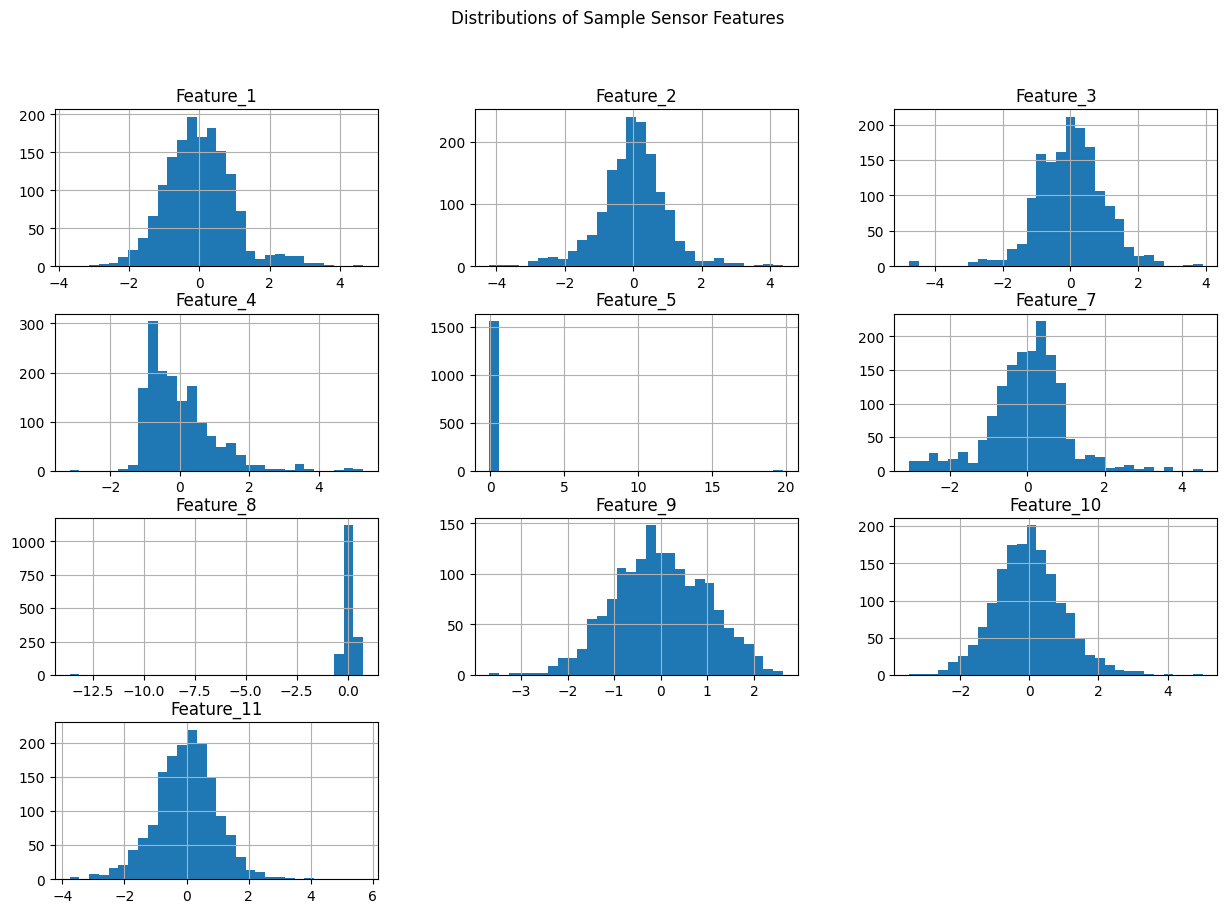

In [25]:
sample_features = numeric_df.columns[:10]
numeric_df[sample_features].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distributions of Sample Sensor Features")
plt.show()

Correlation heatmap (for first 20 features)

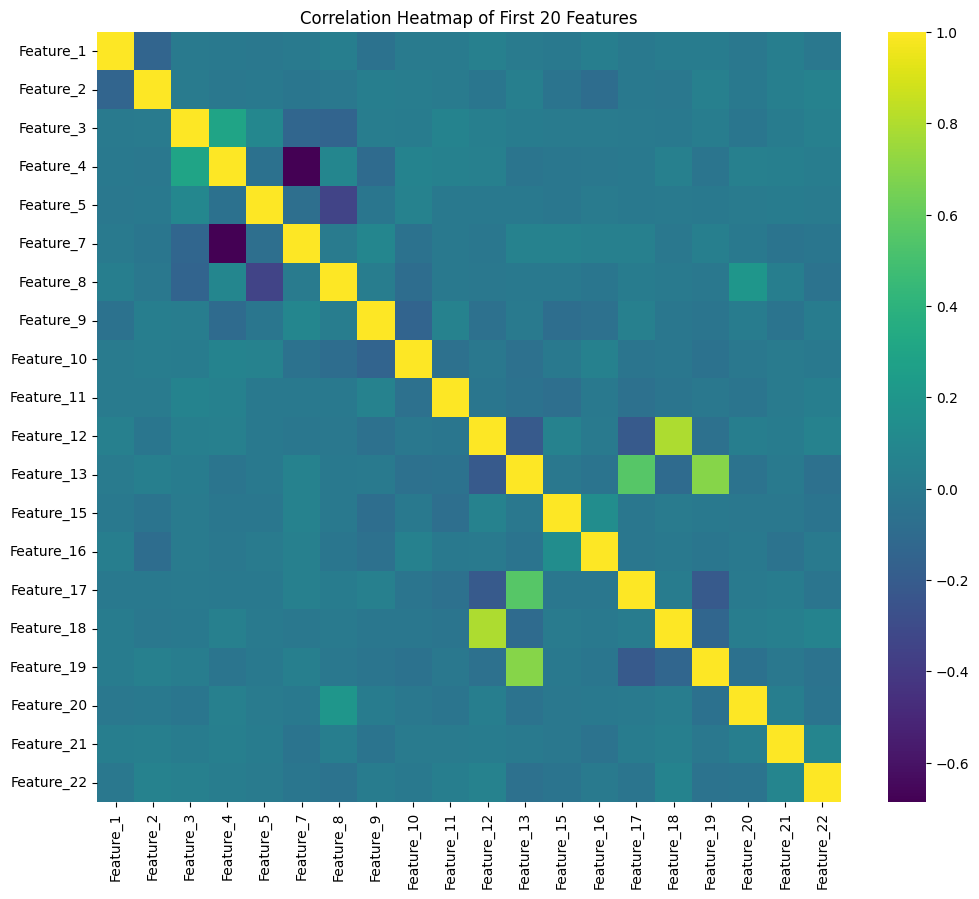

In [33]:
# Correlation heatmap of first 20 features, which informs us about multicollinearity, meaning some features are highly correlated, by visualizing the correlation matrix. If we wanted to see how they correlate in the target pass/fail context, we could compute correlations with the target variable separately.

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.iloc[:, :20].corr(), annot=False, cmap='viridis')
plt.title("Correlation Heatmap of First 20 Features")
plt.show()

Correlate features to target feature (pass/fail)

In [27]:
target_corr = numeric_df.corr()['Pass/Fail'].sort_values(ascending=False)
print(target_corr)

Pass/Fail      1.000000
Feature_60     0.156008
Feature_104    0.151230
Feature_511    0.131662
Feature_349    0.130807
                 ...   
Feature_181   -0.078631
Feature_27    -0.080579
Feature_126   -0.083644
Feature_317   -0.089385
Feature_29    -0.106987
Name: Pass/Fail, Length: 475, dtype: float64


Identify constant or near-constant features (threshold = 1 unique value)

In [30]:
constant_features = dpf.find_constant_features(numeric_df, threshold=1)
print(f"Number of constant features: {len(constant_features)}")
print("Constant / near-constant features:", constant_features)

Number of constant features: 0
Constant / near-constant features: []


In [32]:
# Visualize a small sample of constant features
if constant_features:
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Take first 10 constant features (if there are that many)
    sample_features = constant_features[:10]
    
    plt.figure(figsize=(12, 4))
    sns.heatmap(numeric_df[sample_features].isnull(), cbar=False, cmap='viridis')
    plt.title("Missing Values in Sample Constant / Near-Constant Features")
    plt.show()
else:
    print("No constant or near-constant features detected.")

No constant or near-constant features detected.


## SECOM – Exploratory Data Analysis Phase Summary

After cleaning the SECOM dataset, we conducted exploratory data analysis to understand the structure, patterns, and potential redundancy among features:


1. **Missing Values and Constant Features**
   - Several features contained missing values; these were addressed using appropriate imputation or removal strategies during the data cleaning phase.
   - Features that were mostly constant (>90% identical values) were identified and removed, as they provide minimal information for classification.

2. **Feature Correlations**
   - A correlation heatmap of the first 20 features highlighted multicollinearity, where certain groups of features are highly correlated with each other.
   - Correlation of individual features with the target (Pass/Fail) showed low values, with the strongest positive correlation around 0.156 (Feature_60) and strongest negative around -0.107 (Feature_29).
   - This indicates that while no single feature is strongly predictive, combinations of features may hold meaningful information.

3. **Redundancy Insight**
   - The dataset contains many correlated or redundant features, as expected from a complex semiconductor manufacturing process where multiple sensors measure related physical phenomena.
   - Redundant features can inflate dimensionality and reduce the efficiency of downstream models.

4. **PCA Motivation**
   - Principal Component Analysis (PCA) is a natural next step to address redundancy.
   - By projecting correlated features into a smaller set of orthogonal principal components, PCA captures the maximum variance in fewer dimensions while reducing noise.
   - This step preserves the underlying structure of the data, enabling more effective classification of the Pass/Fail target.

### Summary:
EDA confirms that the SECOM dataset is high-dimensional, contains missing values, and exhibits multicollinearity. Individual feature correlations with the target are weak, suggesting that dimensionality reduction (via PCA) and feature selection will be critical for building predictive models.